# Introduction
We want to learn a function $\tau$ that maps a graph $\mathbf{G}$ and one of its node $n$ to a vector of reals:

\begin{equation}
 \tau: (\mathbf{G},n) \mapsto \mathbb{R}^m
\end{equation}

There are two broad applications of GNN. They can be classified as _graph-focused_ and _node-focused_. In graph-focused applications, $\tau$ is independent of $n$ so that $\tau: \mathbf{G} \mapsto \mathbb{R}^m$. In node-focused application, $\tau$ depends on the properties of each node $n$. GNNs are suitable for both graph- and node-focused applications.

GNNs are based on an information diffusion mechanism. A graph is processed by a set of units, each one corresponding to a node of the graph, which are linked according to the graph connectivity. The units update their states and exchange information until they reach a stable equilibrium. The output of a GNN is then computed locally at each node on the base of the unit state. The diffusion mechanism is constrained in order to ensure that a unique stable equilibrium always exists.

# Notations
$\mathbf{G}$ is a graph.It is a pair $(\mathbf{N},\mathbf{E})$, where $\mathbf{N}$ is the set of nodes and $\mathbf{E}$ is the set of edges. The set ${\rm ne}[n]$ stands for the neighbors of $n$ and the set ${\rm co}[n]$ stands for the edges that connect to $n$.

Nodes and edges may have labels represented by real vectors. The labels attached to node $n$ and edge $(n_1,n_2)$ will be represented by $\mathbf{l}_n$ and $\mathbf{l}_{(n_1,n_2)}$, respectively. Labels usually include features of objects related to nodes and features of the relationships between the objects.

Each graph $\mathbf{G}_i$ has a set of nodes $\mathbf{N}_i$ and a set of edges $\mathbf{E}_i$. The $j^{\rm th}$ node in the set $\mathbf{N}_i$ is referred to as $n_{ij}$ and the desired node-level target associated to $n_{ij}$ is referred to as $\mathbf{t}_{ij}$.

### Example
![Exemple of graphs](graphs.jpg)

$\mathbf{G}_1$ has four nodes and three edges so that 

- $\mathbf{N}_1$ is the set of nodes: $\left\{ n_{1,1} ; n_{1,2} ; n_{1,3} ; n_{1,4} \right\}$


- $\mathbf{E}_1$ is the set of edges: $\left\{ (n_{1,1},n_{1,2}) ; (n_{1,2},n_{1,3}) ; (n_{1,3},n_{1,4})\right\}$


- Each node has a target $\mathbf{t}\in\mathbb{R}^m$: $\left\{ \mathbf{t}_{1,1} ; \mathbf{t}_{1,2} ; \mathbf{t}_{1,3} ; \mathbf{t}_{1,4} \right\}$


$\mathbf{G}_2$ has five nodes and five edges so that 

- $\mathbf{N}_2 = \left\{ n_{2,1} ; n_{2,2} ; n_{2,3} ; n_{2,4} ; n_{2,5} \right\}$


- $\mathbf{E}_2 = \left\{ (n_{2,1},n_{2,2}) ; (n_{2,2},n_{2,3}) ; (n_{2,3},n_{2,4}) ; (n_{2,3},n_{2,5}) ; (n_{2,4},n_{2,5})\right\}$


- Each node has a target $\mathbf{t}\in\mathbb{R}^m$: $\left\{ \mathbf{t}_{2,1} ; \mathbf{t}_{2,2} ; \mathbf{t}_{2,3} ; \mathbf{t}_{2,4} ; \mathbf{t}_{2,5} \right\}$

The learning set $\mathcal{L}$ can be seen as all the pairs $(\mathbf{G},\mathcal{T})$ where $\mathbf{G}=(\mathbf{N}, \mathbf{E})$ is a graph and $\mathcal{T}$ is a set of pairs $\left\{ (n_i,\mathbf{t}_i) \right\}$.

# The Model
The intuitive idea underlining the GNNs is that nodes in a graph represent objects or concepts, and edges represent their relationships. Each node is naturally defined by its features and the related nodes. We define the _state_ of node $n$ by $\mathbf{x}_n$. It is a multi-dimensional real vector that is based on the information contained in the neighborhood of $n$. The state $\mathbf{x}_n$ can be used to produce an _output_ $\mathbf{o}_n$.

The _local transition function_ $f_{\mathbf{w}}$, parameterized by $\mathbf{w}$, expresses the dependence of a node $n$ on its neighborhood and the _local output function_ $g_{\mathbf{w}}$ describes how the output is produced. Since the state $\mathbf{x}_n$ of node $n$ depends on its own features, as well as those of the neighborhood, it is a function of:
- The labels (features) of node $n$: $\mathbf{l}_n$.
- The labels of its connecting edges: $\mathbf{l}_{{\rm co}[n]}$.
- The state of all its neighbors: $\mathbf{x}_n$.
- The labels (features) of all its neighbors: $\mathbf{l}_{{\rm ne}[n]}$.

We can therefore write that:
$$ \mathbf{x}_n =  f_{\mathbf{w}}\left( \mathbf{l}_n, \mathbf{l}_{{\rm co}[n]}, \mathbf{x}_n, \mathbf{l}_{{\rm ne}[n]} \right)$$

Then, based on the state and the features of node $n$, we use $g_{\mathbf{w}}$ to calculate the ouput:
$$ \mathbf{o}_n = g_{\mathbf{w}}\left( \mathbf{x}_n, \mathbf{l}_n \right) $$

Note 1: Different notions of neighborhood can be adopted. For example, we could remove the labels $\mathbf{l}_n$ since they are already included in the state $\mathbf{x}_n$. Same for $\mathbf{l}_{{\rm ne}[n]}$.

Note 2: Different transition and output functions can be used for different kind of nodes. If that's the case, an additional parameter $k$ can be used to group different the different kinds.

Let $\mathbf{x}$, $\mathbf{o}$, $\mathbf{l}$, $\mathbf{l_N}$ be the vectors constructed by stacking all the states, all the outputs, all the labels, and all the node labels, respectively. Previous equations can be rewritten in a compact form:
$$ \mathbf{x} = F_{\mathbf{w}}\left(\mathbf{x}, \mathbf{l} \right) $$

$$ \mathbf{o} = G_{\mathbf{w}}\left( \mathbf{x}, \mathbf{l_N} \right) $$

where $F_{\mathbf{w}}$ and $G_{\mathbf{w}}$ are the _global transition_ and _output functions_, respectively.

It is useful to replace the local transition function with:
$$ \mathbf{x}_n = \sum\limits_{u\in{\rm ne}[n]} h_{\mathbf{w}}\left( \mathbf{l}_n, \mathbf{l}_{(n,u)}, \mathbf{x}_u, \mathbf{l}_{u} \right), \qquad n\in\mathbf{N}$$

In order to implement the GNN model, the following items are needed:
1. A method to solve the two above equations and find the state of node $n$.
2. A learning algorithm to estimate $\mathbf{w}$ examples from the training set.
3. An implementation of the local transition and output functions.

### Example
Let's take the formaldehyde molecule as an example:
![formaldehyde](formaldehyde.jpg)

Each atom (node) has the following feature: `nuclear_charge`, `hybridization`.

Each bond (edge) has the following feature: `bond_order`

In [1]:
import collections
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole

m = Chem.MolFromSmiles('c1nccc2n1ccc2')
m = Chem.AddHs(m)

node_features = collections.defaultdict(dict)
edge_features = collections.defaultdict(dict)

# For each atom in the molecule
for atom in m.GetAtoms():
    
    # Get atom features
    node_features[atom.GetIdx()]['nuclear_charge'] = int(atom.GetAtomicNum())
    node_features[atom.GetIdx()]['hybridization'] = int(atom.GetHybridization())
    
for idx, bond in enumerate(m.GetBonds()):
    edge_features[bond.GetIdx()]['bond_order']=int(bond.GetBondTypeAsDouble())

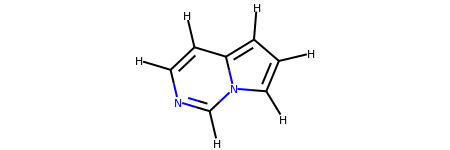

In [2]:
m

In [3]:
def one_hot_encoding(x, set):
    one_hot = [int(x == s) for s in set]
    if 0:
        if sum(one_hot)==0: print('one_hot_encoding() return NULL!', x, set)
    return one_hot

BOND_TYPE = [
    Chem.rdchem.BondType.SINGLE,
    Chem.rdchem.BondType.DOUBLE,
    Chem.rdchem.BondType.TRIPLE,
    Chem.rdchem.BondType.AROMATIC,
]

import numpy as np

num_edge = len(m.GetBonds())
edge_index = np.zeros((2*num_edge,2), np.uint8)
bond_type  = np.zeros((2*num_edge,len(BOND_TYPE)), np.uint8)#

ij=0

for atom1 in m.GetAtoms():
    for atom2 in atom1.GetNeighbors():
        
        edge_index[ij] = [atom1.GetIdx(),atom2.GetIdx()] 
        
        bond = m.GetBondBetweenAtoms(atom1.GetIdx(), atom2.GetIdx())
        bond_type[ij] = one_hot_encoding(bond.GetBondType(),BOND_TYPE)
        
        ij+=1